In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# Set up Spotify API credentials
client_id = '8a9262cf15dd4e16bd72737b6e6a93ee'
client_secret = '1b7eb12115884c8eb165f3291eaa55c6'
redirect_uri = 'https://en.wikipedia.org/wiki/India'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_id(track_name):
    """Get the Spotify track ID for a given track name."""
    results = sp.search(q='track:' + track_name, type='track')
    return results['tracks']['items'][0]['id']

def get_track_features(track_id):
    """Get the valence and arousal (danceability) for a given track ID."""
    features = sp.audio_features([track_id])
    valence = features[0]['valence']
    arousal = features[0]['danceability']
    return valence, arousal


def plot_valence_arousal(valence, arousal, track_name):
    """Plot the valence and arousal for a given track."""
    plt.scatter(valence, arousal)
    plt.xlabel('Valence')
    plt.ylabel('Arousal')
    plt.title(f'Valence and Arousal for {track_name}')
    plt.show()

track_name = 'willow'  # Replace with your song name
track_id = get_track_id(track_name)
print(track_id)
valence, arousal = get_track_features(track_id)
plot_valence_arousal(valence, arousal, track_name)


0lx2cLdOt3piJbcaXIV74f


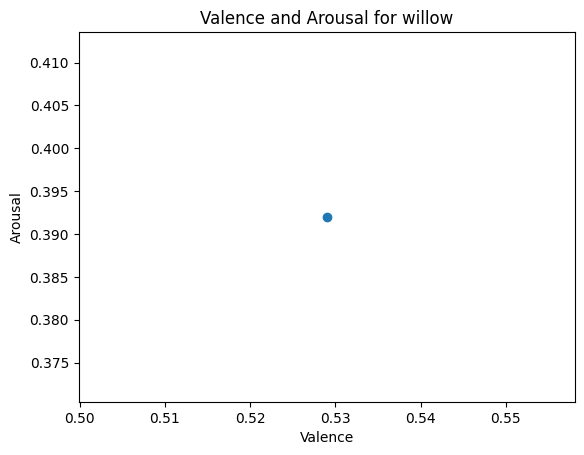